<a href="https://colab.research.google.com/github/VirenderTanwar/Machine-Learning-with-Python/blob/master/Quora_Spam_Question_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
!wget https://www.dropbox.com/sh/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv?dl=0

--2020-02-07 18:32:58--  https://www.dropbox.com/sh/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv [following]
--2020-02-07 18:32:58--  https://www.dropbox.com/sh/raw/kpf9z73woodfssv/AAAwZ5DDt-aHwqZFHYrZ-ZBHa/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6ff9f6902a5bd86205fb7d911a.dl.dropboxusercontent.com/cd/0/inline/Axps5CdqAQSXBrPKmG64wCnTa-a0v0KGQuZuK4aUTNZX6oCOFrnbV6giDBqL2uOkSzwISGVVCo8i6PeJpGawczdSILLMUIPqSmRTFnh3pFceyw/file# [following]
--2020-02-07 18:32:58--  https://uc6ff9f6902a5bd86205fb7d911a.dl.dropboxusercontent.com/cd/0/inline/Axps5CdqAQSXBrPKmG64wCnTa-a0v0KGQuZuK4aUTNZX6oCOFrnbV6giDB

In [0]:
file=r'/content/train.csv?dl=0'

In [0]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Activation,Dense,Input,Embedding,Dropout
from tensorflow.keras.models import Model

In [5]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data=pd.read_csv(file)

In [8]:
data.shape

(1306122, 3)

In [0]:
del data['qid']

In [10]:
data.shape

(1306122, 2)

In [11]:
[(x,data[x].nunique()) for x in data.columns]

[('question_text', 1306122), ('target', 2)]

In [12]:
data['target'].value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

In [0]:
spam_text=" ".join(data.loc[data['target']==1,'question_text'])
ham_text=" ".join(data.loc[data['target']==0,'question_text'])

(-0.5, 399.5, 199.5, -0.5)

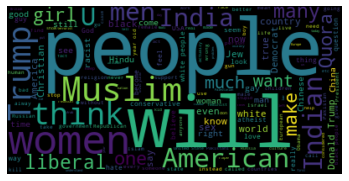

In [14]:
wordcloud = WordCloud().generate(spam_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

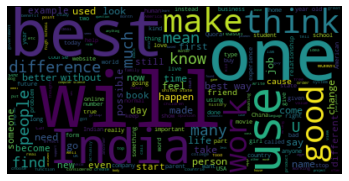

In [15]:
wordcloud = WordCloud().generate(ham_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

   # Text Emdeding


In [16]:
!wget http://nlp.stanford.edu/data/glove.42B.300d.zip

!unzip /content/glove.42B.300d.zip

--2020-02-07 18:34:09--  http://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.42B.300d.zip [following]
--2020-02-07 18:34:10--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2020-02-07 18:34:10--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Sav

In [17]:
ls

 glove.42B.300d.txt   glove.42B.300d.zip   sample_data/  'train.csv?dl=0'


In [18]:
!rm /content/AAAw1_JIzpuVvwteJCma0xMla?dl=0
!rm /content/glove.42B.300d.zip

rm: cannot remove '/content/AAAw1_JIzpuVvwteJCma0xMla?dl=0': No such file or directory


In [0]:
embedding_index={}

f=open('glove.42B.300d.txt',encoding='utf-8')

for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype='float32')
  embedding_index[word]=coefs
f.close()

In [20]:
list(embedding_index.keys())[:10]

[',', 'the', '.', 'and', 'to', 'of', 'a', 'in', '"', 'is']

In [0]:
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(data,test_size=0.2)

In [0]:
data_train.reset_index(inplace=True,drop=True)
data_test.reset_index(inplace=True,drop=True)

In [0]:
x_train=data_train['question_text']
y_train=data_train['target']
x_test=data_test['question_text']
y_test=data_test['target']

In [24]:
sent_lens=[len(word_tokenize(x)) for x in x_train]
max(sent_lens)

412

In [25]:
n_95=int(np.percentile(sent_lens,95))
n_95

30

In [0]:
max_len=n_95

tk=Tokenizer(char_level=False,split=' ')

tk.fit_on_texts(x_train)

seq_train=tk.texts_to_sequences(x_train)
seq_test=tk.texts_to_sequences(x_test)

vocab_size=len(tk.word_index)

seq_train_matrix=sequence.pad_sequences(seq_train,maxlen=max_len)
seq_test_matrix=sequence.pad_sequences(seq_test,maxlen=max_len)

In [27]:
vocab_size

196190

In [0]:
embedding_matrix=np.zeros((vocab_size+1,300))

for word,i in tk.word_index.items():
    embed_vector=embedding_index.get(word)
    if embed_vector is not None:
        embedding_matrix[i]=embed_vector


In [0]:
inputs=Input(name='text_input',shape=[max_len])
embed=Embedding(vocab_size+1,300,input_length=max_len,mask_zero=True,
                weights=[embedding_matrix],trainable=False)(inputs)
lstm_layer=LSTM(64)(embed)

dense1=Dense(32,activation='relu',name='Dense_1')(lstm_layer)

drop1=Dropout(0.2)(dense1)

dense2=Dense(16,activation='relu',name='Dense_2')(drop1)

drop2=Dropout(0.3)(dense2)

final_layer=Dense(1,activation='sigmoid',name='Last_Dense')(drop2)

model=Model(inputs=inputs,outputs=final_layer)

In [30]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_input (InputLayer)      [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 300)           58857300  
_________________________________________________________________
lstm (LSTM)                  (None, 64)                93440     
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
Dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0     

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping, Callback
import os

In [0]:
outputFolder='./model_output'

if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)

In [0]:
filepath=outputFolder+"/weights-{epoch:02d}-{val_accuracy:.4f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=False, 
                             save_weights_only=True, 
                             mode='auto', period=5)

earlystop = EarlyStopping(monitor='val_acc', 
                          min_delta=0.001, patience=5,
                          verbose=1, mode='auto')


In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(seq_train_matrix,y_train.values,validation_data=[seq_test_matrix,y_test.values],epochs=50,class_weight={0:1,1:12},
          batch_size=5000,callbacks=[checkpoint,earlystop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 1044897 samples, validate on 261225 samples
Epoch 1/50
1044897/1044897 [==============================] - 29s 28us/sample - loss: 0.5958 - accuracy: 0.8660 - val_loss: 0.4806 - val_accuracy: 0.8702
Epoch 2/50
   5000/1044897 [..............................] - ETA: 21s - loss: 0.5366 - accuracy: 0.8654

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:842: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1044897/1044897 [==============================] - 25s 24us/sample - loss: 0.4937 - accuracy: 0.8910 - val_loss: 0.4554 - val_accuracy: 0.9099
Epoch 3/50
1044897/1044897 [==============================] - 25s 23us/sample - loss: 0.4629 - accuracy: 0.8969 - val_loss: 0.4412 - val_accuracy: 0.9165
Epoch 4/50
1040000/1044897 [============================>.] - ETA: 0s - loss: 0.4396 - accuracy: 0.9004
Epoch 00004: saving model to ./model_output/weights-04-0.9198.h5
1044897/1044897 [==============================] - 26s 25us/sample - loss: 0.4395 - accuracy: 0.9004 - val_loss: 0.4346 - val_accuracy: 0.9198
Epoch 5/50
1044897/1044897 [==============================] - 25s 24us/sample - loss: 0.4215 - accuracy: 0.9044 - val_loss: 0.4201 - val_accuracy: 0.9061
Epoch 6/50
1044897/1044897 [==============================] - 25s 24us/sample - loss: 0.4076 - accuracy: 0.9058 - val_loss: 0.4304 - val_accuracy: 0.9180
Epoch 7/50
1044897/1044897 [==============================] - 25s 24us/sample - los

In [0]:
from google.colab import files
files.download("/content/model_output/weights-49-0.9274.h5")

In [0]:
p=model.predict(seq_test_matrix)

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,p)

0.9547859432924167